In [7]:
import pandas as pd

df = pd.DataFrame()

In [8]:
def api_runner():
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import pytz
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6835e96a-07a3-42a0-8b4f-9a55d20fe4c4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    
    
    timezone = pytz.timezone('Etc/GMT-3')
    df2['timestamp']= pd.to_datetime('now', utc=True).astimezone(timezone)
    
    df = pd.concat([df, df2], ignore_index=True)

In [9]:
import os

from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10239,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939079e+07,1.939079e+07,...,45.9218,5.689149e+11,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00
1,1027,Ethereum,ETH,ethereum,6963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202428e+08,1.202428e+08,...,19.8762,2.274010e+11,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00
2,825,Tether,USDT,tether,54949,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.324969e+10,8.609064e+10,...,7.2778,8.610614e+10,None,2023-06-02T10:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 13:34:02.878287+03:00
3,1839,BNB,BNB,bnb,1440,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558563e+08,1.558563e+08,...,4.1888,4.791174e+10,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00
4,3408,USD Coin,USDC,usd-coin,12784,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.896155e+10,2.896155e+10,...,2.5318,2.895805e+10,None,2023-06-02T10:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 13:34:02.878287+03:00
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198339e+10,9.998892e+10,...,2.3371,5.142250e+10,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00
6,2010,Cardano,ADA,cardano,811,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.488571e+10,3.584278e+10,...,1.1406,1.682877e+10,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.395986e+11,1.395986e+11,...,0.8801,1.006687e+10,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00
8,5426,Solana,SOL,solana,468,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.967087e+08,5.490270e+08,...,0.7354,1.164122e+10,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00
9,3890,Polygon,MATIC,polygon,728,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",1.000000e+10,9.279469e+09,1.000000e+10,...,0.7346,9.054631e+09,None,2023-06-02T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:34:02.878287+03:00


In [11]:
#Correct the float values format and their decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [12]:
#Group the data by the percent changes
df1 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [13]:
#stack it to have a better grouping format but the stacking converts the DF into a Series
df2 = df1.stack()

In [17]:
#Convert the Series into a DF
df3 = df2.to_frame(name='values')

In [20]:
#Check the number of rows
len(df3)

60

In [22]:
#Assign an index according to the row number
index = pd.Index(range(60))
#df4 = df3.set_index(index)
df4 = df3.reset_index()

In [23]:
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15
1,Bitcoin,quote.USD.percent_change_24h,0.69
2,Bitcoin,quote.USD.percent_change_7d,2.38
3,Bitcoin,quote.USD.percent_change_30d,-5.41
4,Bitcoin,quote.USD.percent_change_60d,-4.75
5,Bitcoin,quote.USD.percent_change_90d,21.17
6,Ethereum,quote.USD.percent_change_1h,-0.06
7,Ethereum,quote.USD.percent_change_24h,1.54
8,Ethereum,quote.USD.percent_change_7d,4.28
9,Ethereum,quote.USD.percent_change_30d,1.31


In [24]:
df5 = df4.rename(columns={'level_1' : 'percent_change'})

In [25]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d', '60d', '90d'])

In [26]:
df5

,name,percent_change,values
0,Bitcoin,1h,-0.15
1,Bitcoin,24h,0.69
2,Bitcoin,7d,2.38
3,Bitcoin,30d,-5.41
4,Bitcoin,60d,-4.75
5,Bitcoin,90d,21.17
6,Ethereum,1h,-0.06
7,Ethereum,24h,1.54
8,Ethereum,7d,4.28
9,Ethereum,30d,1.31


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

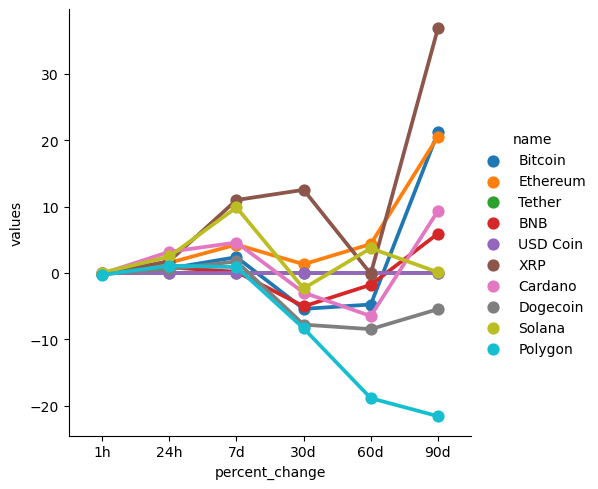

In [29]:
sns.catplot(x = 'percent_change', y = 'values', hue='name', data= df5, kind= 'point')

In [31]:
df6 = df[['name','quote.USD.price','timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,27091.19,2023-06-02 13:34:02.878287+03:00
10,Bitcoin,27094.41,2023-06-02 13:35:03.378438+03:00
20,Bitcoin,27086.56,2023-06-02 13:36:03.791564+03:00
30,Bitcoin,27081.57,2023-06-02 13:37:04.270099+03:00
40,Bitcoin,27083.47,2023-06-02 13:38:04.670211+03:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

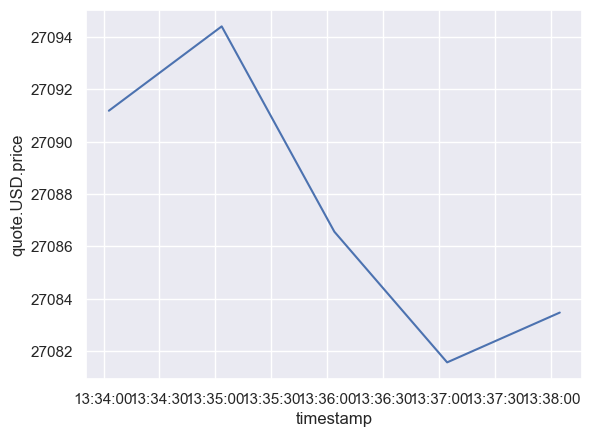

In [32]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df6)